<a href="https://colab.research.google.com/github/Tomkelou/matsim-example-project_Tomkelou/blob/master/DLprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install py7zr
import py7zr
import os

print(os.listdir())
with py7zr.SevenZipFile('sample_data/Renewables_Datasets.7z', mode='r') as z:
     z.extractall()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 27.5 MB/s eta 0:00:00
['.config', 'sample_data']


In [ ]:
!pip install netCDF4
!pip install basemap‑1.2.1‑cp37‑cp37m‑win_amd64.whl
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap

ERROR: basemap‑1.2.1‑cp37‑cp37m‑win_amd64.whl is not a valid wheel filename.


<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['ssrd', 'e', 't2m', 'i10fg', 'dayl', 'longitude', 'latitude', 'time'])


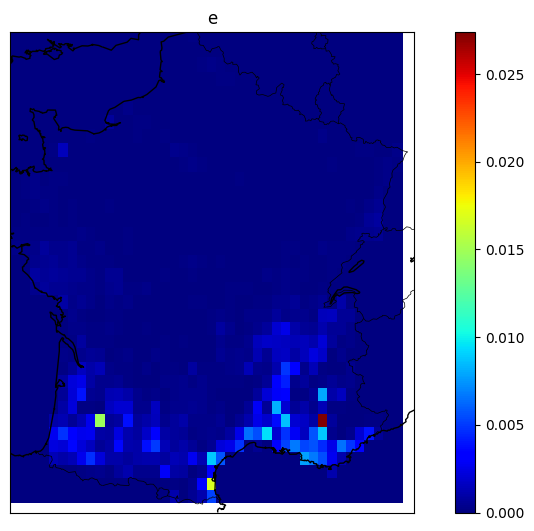

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
file = 'sample_data/Solar/1.Train/power_weighted_weather_data_train.nc' # mention the path to the downloaded file
data = Dataset(file, mode='r') # read the data
print(type(data)) # print the type of the data
print(data.variables.keys()) # print the variables in the data

lats = data.variables['latitude'][:]
longs = data.variables['longitude'][:]
time = data.variables['time'][:]

e = data.variables['ssrd'][:]

mp = Basemap(projection='merc',
             llcrnrlon=-2.490290,   # lower longitude 42.174890, -2.490290
             llcrnrlat=42.174890,    # lower latitude
             urcrnrlon=8.405959,   # uppper longitude 51.037323, 8.405959
             urcrnrlat=51.037323,   # uppper latitude
            resolution = 'i')

lon, lat = np.meshgrid(longs,lats)  #this converts coordinates into 2D arrray
x,y = mp(lon,lat) #mapping them together
plt.figure(figsize=(6,8)) #figure size
c_scheme = mp.pcolor(x,y,np.squeeze(e[0,:,:]),cmap = 'jet') # [0,:,:] is for the first day of the year

# consider this as the outline for the map that is to be created
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.title('e')
plt.show()

plt.savefig('e.jpg',dpi=300) #saves the image generated



In [ ]:
lon, lat = np.meshgrid(longs,lats)
x,y = mp(lon,lat)
plt.figure(figsize=(6,8))

# loop for all the days
days = np.arange(0,365)  # for considering all days of the year

for i in days:
    c_scheme = mp.pcolor(x,y,np.squeeze(e[i,:,:]),cmap = 'jet')

    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()

    cbar = mp.colorbar(c_scheme,location='right',pad = '10%')
    day = i+1

    plt.title('Average Temperature for the Day ' + str(day) +  ' of year 2019')
    plt.clim(0,0.003)

    plt.savefig(str(day)+'.jpg')
    plt.clf()

<Figure size 600x800 with 0 Axes>

In [ ]:
#!pip install pillow
import PIL
import os

image_frames = [] # creating a empty list to be appended later on
days = np.arange(1,365)

for k in days:
    path = os.path.join(f'{k}.jpg')
    new_fram = PIL.Image.open(path)
    image_frames.append(new_fram)

image_frames[0].save('tave_timelapse.gif',format='GIF',
                    append_images = image_frames[1: ],
                    save_all = True, duration = 100,
                    loop = 0)

In [ ]:

from matplotlib import pyplot as plt
import pandas as pd
import netCDF4 as nc


fp='Solar/1.Train/power_weighted_weather_data_train.nc'
ds = nc.Dataset(fp)
#plt.imshow(nc['Temp'][1,:,0,:])
#plt.show()



# Print the dimensions
#print(ds.dimensions)

# Print the variables
#print(ds.variables.keys())

# Access a variable
#temperature = ds.variables['i10fg']
#print(temperature[:])
#for name in ds.variables.keys():
data = ds.variables['i10fg']
print(data.units)
#print('i10fg', data.units)#, data.shape,data.dtype, data.dimensions)

# Close the file
ds.close()

AttributeError: NetCDF: Attribute not found